Szöveggenerálás

1. GRU

Szöveg beolvasása

In [1]:
with open("./donquixote.txt", "r", encoding="utf8") as f:
    text = f.read().lower()

print(len(text))

2298195


In [2]:
text[:500]

'don quixote\n\n\n\nby miguel de cervantes\n\n\n\ntranslated by john ormsby\n\ncontents volume i\n\n\nintroduction\n\nprefaratory\n\ncervantes\n\n‘don quixote’\n\nthe author’s preface\n\ncommendatory verses\n\n\n\n\nchapter i which treats of the character and\npursuits of the famous gentleman don quixote of la mancha \n\nchapter ii which treats of the first sally the ingenious\ndon quixote made from home \n\nchapter iii\nwherein is related the droll way in which don quixote had himself dubbed a\nknight \n\nchapter iv of what happened'

Szöveg feldarabolása

In [3]:
import numpy as np
from tqdm import tqdm

maxlen = 60
step = 3
sequences = []
next_chars = []

for i in tqdm(range(0, len(text) - maxlen, step)):
    sequences.append(text[i: i + maxlen])
    next_chars.append(text[i + maxlen])
len(sequences)

100%|██████████| 766045/766045 [00:00<00:00, 1307647.38it/s]


766045

In [4]:
for i in range(5): print(repr(sequences[i])," : ", next_chars[i])

'don quixote\n\n\n\nby miguel de cervantes\n\n\n\ntranslated by john '  :  o
' quixote\n\n\n\nby miguel de cervantes\n\n\n\ntranslated by john orm'  :  s
'ixote\n\n\n\nby miguel de cervantes\n\n\n\ntranslated by john ormsby'  :  

'te\n\n\n\nby miguel de cervantes\n\n\n\ntranslated by john ormsby\n\nc'  :  o
'\n\n\nby miguel de cervantes\n\n\n\ntranslated by john ormsby\n\ncont'  :  e


Karakterek a szövegben

In [5]:
chars = sorted(list(set(text)))
print(chars)

['\n', ' ', '!', '&', '(', ')', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '>', '?', '_', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'à', 'á', 'æ', 'è', 'é', 'ë', 'í', 'ñ', 'ó', 'ù', 'ú', 'œ', '—', '‘', '’', '“', '”']


In [6]:
char_indices = dict((char, chars.index(char)) for char in chars)
print(char_indices)

{'\n': 0, ' ': 1, '!': 2, '&': 3, '(': 4, ')': 5, ',': 6, '-': 7, '.': 8, '/': 9, '0': 10, '1': 11, '2': 12, '3': 13, '4': 14, '5': 15, '6': 16, '7': 17, '8': 18, '9': 19, ':': 20, ';': 21, '>': 22, '?': 23, '_': 24, 'a': 25, 'b': 26, 'c': 27, 'd': 28, 'e': 29, 'f': 30, 'g': 31, 'h': 32, 'i': 33, 'j': 34, 'k': 35, 'l': 36, 'm': 37, 'n': 38, 'o': 39, 'p': 40, 'q': 41, 'r': 42, 's': 43, 't': 44, 'u': 45, 'v': 46, 'w': 47, 'x': 48, 'y': 49, 'z': 50, 'à': 51, 'á': 52, 'æ': 53, 'è': 54, 'é': 55, 'ë': 56, 'í': 57, 'ñ': 58, 'ó': 59, 'ù': 60, 'ú': 61, 'œ': 62, '—': 63, '‘': 64, '’': 65, '“': 66, '”': 67}


In [7]:
indices_char = dict((chars.index(char), char) for char in chars)
print(indices_char)

{0: '\n', 1: ' ', 2: '!', 3: '&', 4: '(', 5: ')', 6: ',', 7: '-', 8: '.', 9: '/', 10: '0', 11: '1', 12: '2', 13: '3', 14: '4', 15: '5', 16: '6', 17: '7', 18: '8', 19: '9', 20: ':', 21: ';', 22: '>', 23: '?', 24: '_', 25: 'a', 26: 'b', 27: 'c', 28: 'd', 29: 'e', 30: 'f', 31: 'g', 32: 'h', 33: 'i', 34: 'j', 35: 'k', 36: 'l', 37: 'm', 38: 'n', 39: 'o', 40: 'p', 41: 'q', 42: 'r', 43: 's', 44: 't', 45: 'u', 46: 'v', 47: 'w', 48: 'x', 49: 'y', 50: 'z', 51: 'à', 52: 'á', 53: 'æ', 54: 'è', 55: 'é', 56: 'ë', 57: 'í', 58: 'ñ', 59: 'ó', 60: 'ù', 61: 'ú', 62: 'œ', 63: '—', 64: '‘', 65: '’', 66: '“', 67: '”'}


X és y feltöltése

In [8]:
X = []
y = []
for i, seq in tqdm(enumerate(sequences)):
    x = [char_indices[char] for char in seq]
    X.append(x)
    y.append([char_indices[next_chars[i]]])

X = np.array(X)
y = np.array(y)
X.shape, y.shape

766045it [00:11, 65729.54it/s] 


((766045, 60), (766045, 1))

Modell összetétele

In [9]:
#!pip install tensorflow

In [10]:
import tensorflow as tf

emb_size = 8
num_chars = len(chars)
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(num_chars, emb_size, input_length=maxlen),
    tf.keras.layers.Conv1D(32, 5, activation='relu'),    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=num_chars, activation='softmax')
]) 

model.compile(loss='sparse_categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 60, 8)             544       
                                                                 
 conv1d (Conv1D)             (None, 56, 32)            1312      
                                                                 
 flatten (Flatten)           (None, 1792)              0         
                                                                 
 dropout (Dropout)           (None, 1792)              0         
                                                                 
 dense (Dense)               (None, 68)                121924    
                                                                 
Total params: 123,780
Trainable params: 123,780
Non-trainable params: 0
_________________________________________________________________


In [ ]:
Tanítás

In [11]:
# with tf.device("/CPU:0"):
model.fit(X, y, epochs=1, batch_size=32)

23939/23939 [==============================] - 95s 4ms/step - loss: 2.2430 - accuracy: 0.3547


Alap szöveg kiválasztása

In [12]:
import random

start_index = random.randint(0, len(text) - maxlen - 1)
base_text = text[start_index: start_index + maxlen]
base_text

' is so fat that he weighs twenty stone challenged another, a'

In [ ]:
Szöveg generálása az alap folytatásához

In [13]:
import sys

next_char = 100
new_text = base_text
sys.stdout.write(new_text)

for _ in range(next_char):
    x = np.array([[char_indices[char] for char in base_text]])  
    predicted = np.argmax(model.predict(np.array([[char_indices[char] for char in new_text]]), verbose=0), axis=-1)
    new_char = indices_char[predicted[0]]
    new_text = new_text[1:] + new_char
    sys.stdout.write(new_char)

 is so fat that he weighs twenty stone challenged another, and the cand the the came the come the come the came the cand the care the care the care the care the

2. 

Szöveg beolvasása

In [14]:
with open("./donquixote.txt", "r", encoding="utf8") as f:
    text = f.read().lower()

print(len(text))

2298195


In [15]:
text[:500]

'don quixote\n\n\n\nby miguel de cervantes\n\n\n\ntranslated by john ormsby\n\ncontents volume i\n\n\nintroduction\n\nprefaratory\n\ncervantes\n\n‘don quixote’\n\nthe author’s preface\n\ncommendatory verses\n\n\n\n\nchapter i which treats of the character and\npursuits of the famous gentleman don quixote of la mancha \n\nchapter ii which treats of the first sally the ingenious\ndon quixote made from home \n\nchapter iii\nwherein is related the droll way in which don quixote had himself dubbed a\nknight \n\nchapter iv of what happened'

In [ ]:
Szöveg feldarabolása

In [16]:
import numpy as np
from tqdm import tqdm

maxlen = 60
step = 3
sentences = []
next_chars = []

for i in tqdm(range(0, len(text) - maxlen, step)):
    sentences.append(text[i: i + maxlen])
    next_chars.append(text[i + maxlen])
len(sentences)

100%|██████████| 766045/766045 [00:00<00:00, 1217088.81it/s]


766045

In [17]:
for i in range(5): print(repr(sentences[i])," : ", next_chars[i])

'don quixote\n\n\n\nby miguel de cervantes\n\n\n\ntranslated by john '  :  o
' quixote\n\n\n\nby miguel de cervantes\n\n\n\ntranslated by john orm'  :  s
'ixote\n\n\n\nby miguel de cervantes\n\n\n\ntranslated by john ormsby'  :  

'te\n\n\n\nby miguel de cervantes\n\n\n\ntranslated by john ormsby\n\nc'  :  o
'\n\n\nby miguel de cervantes\n\n\n\ntranslated by john ormsby\n\ncont'  :  e


Karakterek a szövegben

In [18]:
chars = sorted(list(set(text)))
print(chars)

['\n', ' ', '!', '&', '(', ')', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '>', '?', '_', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'à', 'á', 'æ', 'è', 'é', 'ë', 'í', 'ñ', 'ó', 'ù', 'ú', 'œ', '—', '‘', '’', '“', '”']


In [19]:
char_indices = dict((char, chars.index(char)) for char in chars)
print(char_indices)

{'\n': 0, ' ': 1, '!': 2, '&': 3, '(': 4, ')': 5, ',': 6, '-': 7, '.': 8, '/': 9, '0': 10, '1': 11, '2': 12, '3': 13, '4': 14, '5': 15, '6': 16, '7': 17, '8': 18, '9': 19, ':': 20, ';': 21, '>': 22, '?': 23, '_': 24, 'a': 25, 'b': 26, 'c': 27, 'd': 28, 'e': 29, 'f': 30, 'g': 31, 'h': 32, 'i': 33, 'j': 34, 'k': 35, 'l': 36, 'm': 37, 'n': 38, 'o': 39, 'p': 40, 'q': 41, 'r': 42, 's': 43, 't': 44, 'u': 45, 'v': 46, 'w': 47, 'x': 48, 'y': 49, 'z': 50, 'à': 51, 'á': 52, 'æ': 53, 'è': 54, 'é': 55, 'ë': 56, 'í': 57, 'ñ': 58, 'ó': 59, 'ù': 60, 'ú': 61, 'œ': 62, '—': 63, '‘': 64, '’': 65, '“': 66, '”': 67}


X és y-ba A karaktereknek megfelelő helyen 1-essel feltöltve

In [47]:
x = np.zeros((len(sentences), maxlen, len(chars)), dtype=bool)
y = np.zeros((len(sentences), len(chars)), dtype=bool)
for i, sentence in tqdm(enumerate(sentences)):
    for t, char in enumerate(sentence):
        x[i, t, char_indices[char]] = 1
    y[i, char_indices[next_chars[i]]] = 1

print("x", x.shape)
print("y", y.shape)

766045it [00:16, 45706.71it/s]


x (766045, 60, 68)
y (766045, 68)


Modell felépítése

In [48]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.GRU(16, input_shape=(maxlen, len(chars))),
    tf.keras.layers.Dense(units=len(chars), activation='softmax')
]) 

model.compile(loss='categorical_crossentropy', 
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1 (GRU)                 (None, 16)                4128      
                                                                 
 dense_4 (Dense)             (None, 68)                1156      
                                                                 
Total params: 5,284
Trainable params: 5,284
Non-trainable params: 0
_________________________________________________________________


Tanítás

In [49]:
with tf.device("/CPU:0"):
    model.fit(x, 
            y,
            batch_size=128,
            epochs=1)

5985/5985 [==============================] - 130s 21ms/step - loss: 2.0379


Alap szöveg kiválasztása

In [50]:
import random

start_index = random.randint(0, len(text) - maxlen - 1)
base_text = text[start_index: start_index + maxlen]
base_text

't he was a very great and that he was a very great and that '

In [51]:
def sample(preds, temperature=1.0):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)

Szöveg generálása az alap folytatásához

In [52]:
import sys
temperatures = [0.2, 0.5, 1.0, 1.2]
gen_characters = 200

for temp in temperatures:
    print("Temp: ", temp)
    generated_text = base_text
    print(generated_text)
    for i in range(gen_characters):
        sampled = np.zeros((1, maxlen, len(chars)))    
        for t, char in enumerate(generated_text):
            sampled[0, t, char_indices[char]] = 1.          
        
        preds = model.predict(sampled, verbose=0)[0]      
        
        next_index = sample(preds, temp)
        next_char = chars[next_index]

        generated_text += next_char
        generated_text = generated_text[1:]

        sys.stdout.write(next_char)
        sys.stdout.flush()

    print()

Temp:  0.2
t he was a very great and that he was a very great and that 
the serde the the the the the the seret the the the the the the the whith the the mand the the seet the seret the the the sancho the serded the don quixote the dent the the the the sour the the sent t
Temp:  0.5
t he was a very great and that he was a very great and that 
the do the reding of the the to eve the mand the mave when of the don quaxorl the soust as the serde and to geived the señor sous the redon the don quixote rather a was sanst the was the marded of be 
Temp:  1.0
t he was a very great and that he was a very great and that 
moakten and coulant to do in rubæf.”


goy
and the seven furte, indan shad that of that not 
it vat ent harding licmoun bite terise theeds
find .”

“your hast, the his not for be exsiofce,” was it bea
Temp:  1.2
t he was a very great and that he was a very great and that 
broulf all, no chol ang sunsle enter a knoront!”

“tory; “don quixte to enpes sist, orme, fown)s
lace drapy, 

3. LSTM

In [26]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, Dense, LSTM, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np 

Szöveg beolvasása

In [27]:
with open("./donquixote.txt", "r", encoding="utf8") as f:
    text = f.read().lower()

print(len(text))

2298195


Szöveg feldarabolása

In [28]:
lines = text.split("\n")

tokenizer = Tokenizer()
tokenizer.fit_on_texts(lines)
num_words = len(tokenizer.word_index) + 1

In [29]:
print(lines[3])
tokenizer.texts_to_sequences([lines[3]])[0]

[]

Tokenizálás

In [30]:
input_sequences = []

for line in lines:
    tokens = tokenizer.texts_to_sequences([line])[0]

    for i in range(1, len(tokens)):
        input_sequences.append(tokens[:i+1])

In [31]:
input_sequences[0]

[22, 35]

In [32]:
max_sequence_len = max([len(i) for i in input_sequences])

In [33]:
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

In [34]:
np.random.shuffle(input_sequences)
X, y = input_sequences[:,:-1], np.expand_dims(input_sequences[:,-1], axis=1)

In [35]:
X.shape

(398526, 18)

In [36]:
X[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,   42,  113,
          4,   25,  486, 3220,    1,  280,  507])

In [37]:
type(X)

numpy.ndarray

In [38]:
y.shape

(398526, 1)

In [39]:
y

array([[ 60],
       [  1],
       [ 87],
       ...,
       [  3],
       [ 30],
       [776]])

In [40]:
num_words

17747

Modell felépítése

In [41]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model

emb_size = 256

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(num_words, emb_size, input_length=max_sequence_len - 1),
    tf.keras.layers.LSTM(120),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256),
    tf.keras.layers.Dense(units=num_words, activation='softmax')
]) 

model.compile(loss='sparse_categorical_crossentropy', 
              optimizer="adam", metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 18, 256)           4543232   
                                                                 
 lstm (LSTM)                 (None, 120)               180960    
                                                                 
 dropout_1 (Dropout)         (None, 120)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               30976     
                                                                 
 dense_3 (Dense)             (None, 17747)             4560979   
                                                                 
Total params: 9,316,147
Trainable params: 9,316,147
Non-trainable params: 0
_________________________________________________________________


In [42]:
plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


Tanítás

In [43]:
callback = EarlyStopping(monitor="loss", patience=3)
history = model.fit(X, y, epochs=5, batch_size=128, verbose=1, callbacks=[callback])

Epoch 1/3
3114/3114 [==============================] - 848s 271ms/step - loss: 5.9598 - accuracy: 0.1094
Epoch 2/3
3114/3114 [==============================] - 850s 273ms/step - loss: 5.3192 - accuracy: 0.1531
Epoch 3/3
3114/3114 [==============================] - 865s 278ms/step - loss: 5.0343 - accuracy: 0.1714


Az epoch-ok adatvesztése

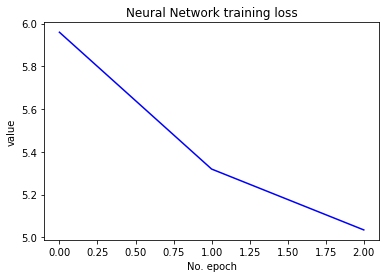

In [44]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='(training data)',color='blue')
plt.title('Neural Network training loss')
plt.ylabel('value')
plt.xlabel('No. epoch')
plt.show()

Az epoch-ok pontossága

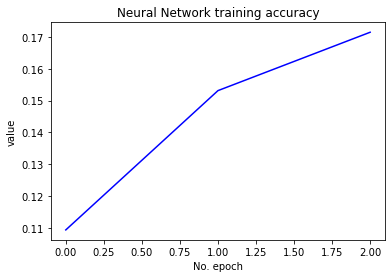

In [45]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='(training data)',color='blue')
plt.title('Neural Network training accuracy')
plt.ylabel('value')
plt.xlabel('No. epoch')
plt.show()

Szöveg generálása

In [55]:
import sys

text = "Luckless that I am!"
next_words = 100

print(text)
for _ in range(next_words):
    tokens = tokenizer.texts_to_sequences([text])[0]
    tokens = pad_sequences([tokens], maxlen=max_sequence_len-1, padding='pre')   
    predicted = np.argmax(model.predict(tokens, verbose=0), axis=-1)
 
    output_word = ""

    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break

    sys.stdout.write(output_word + " ")
    text += " " + output_word

The philosophy of the dogmatists, it is to be hoped, was only a promise for thousands of years afterwards


ValueError: in user code:

    File "D:\Anaconda\lib\site-packages\keras\engine\training.py", line 2137, in predict_function  *
        return step_function(self, iterator)
    File "D:\Anaconda\lib\site-packages\keras\engine\training.py", line 2123, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "D:\Anaconda\lib\site-packages\keras\engine\training.py", line 2111, in run_step  **
        outputs = model.predict_step(data)
    File "D:\Anaconda\lib\site-packages\keras\engine\training.py", line 2079, in predict_step
        return self(x, training=False)
    File "D:\Anaconda\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "D:\Anaconda\lib\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_3" is incompatible with the layer: expected shape=(None, 60, 68), found shape=(None, 18)
